<a href="https://colab.research.google.com/github/rgbehsan-x/IoT/blob/main/IoT_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
dataset = pd.read_csv('HomeC.csv')

<ipython-input-2-b56c9c3fa944>:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('HomeC.csv')


In [ ]:
dataset['cloudCover'] = pd.to_numeric(dataset['cloudCover'], errors='coerce')

In [ ]:
dataset.fillna(method='ffill', inplace=True)

<ipython-input-4-e5f1b1690043>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)


In [ ]:
numerical_features = ['use [kW]', 'temperature', 'humidity', 'visibility', 'pressure', 'windSpeed', 'cloudCover']
categorical_features = ['icon', 'summary']

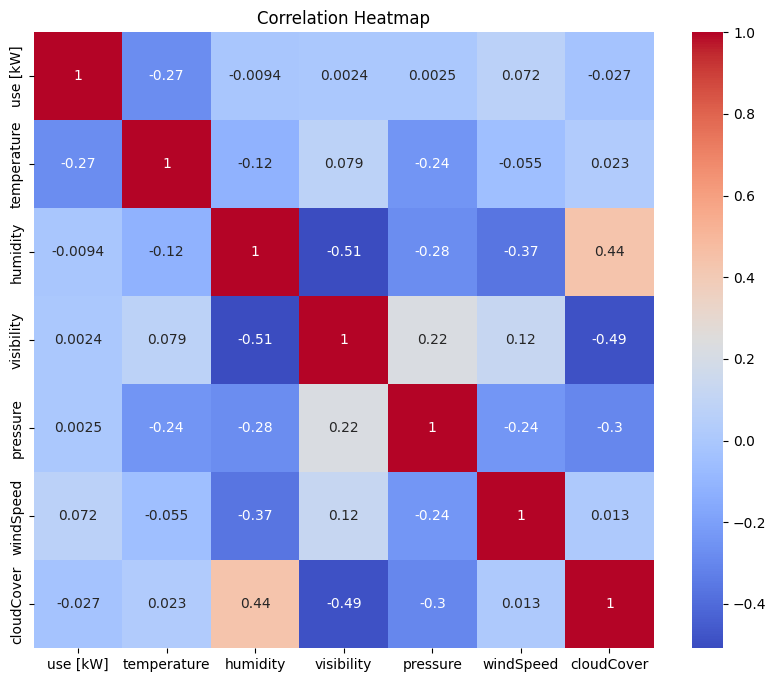

In [ ]:
numerical_data = dataset[numerical_features]
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
dataset['time'] = pd.to_datetime(dataset['time'], errors='coerce', unit='s')
dataset['hour'] = dataset['time'].dt.hour
dataset['day_of_week'] = dataset['time'].dt.dayofweek

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(dataset[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
dataset = pd.concat([dataset, encoded_df], axis=1)
dataset.drop(columns=categorical_features, inplace=True)

In [ ]:
# Step 5: Prepare Data for Modeling
X = dataset.drop(columns=['time', 'use [kW]'])
y = dataset['use [kW]']

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
features_to_exclude = ['House overall [kW]', 'gen [kW]']
X = dataset.drop(columns=['time', 'use [kW]'] + features_to_exclude, errors='ignore')
y = dataset['use [kW]']


In [ ]:

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.08744822528007282
R-squared Score: 0.7884886320194392


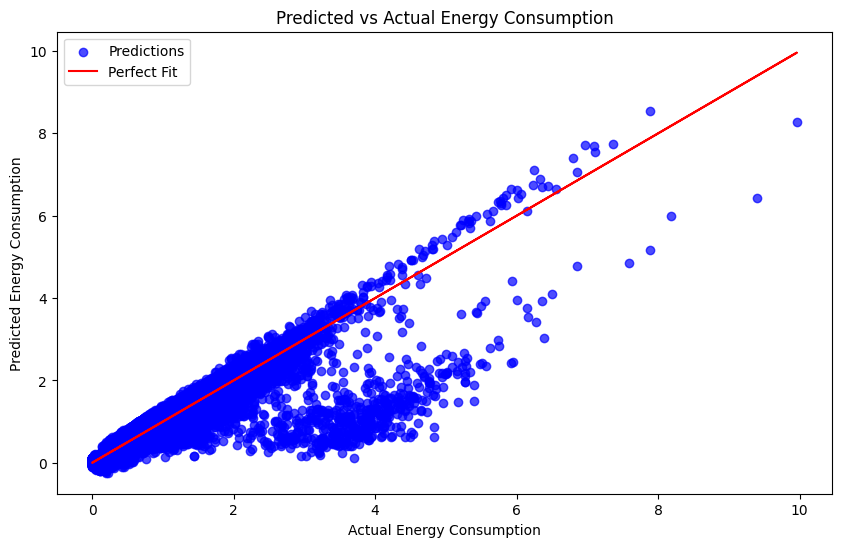

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.title("Predicted vs Actual Energy Consumption")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.legend()
plt.show()

In [ ]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
                             Feature  Importance
13                  Living room [kW]    1.558400
4                        Fridge [kW]    1.428497
7                    Kitchen 12 [kW]    1.365885
6                   Garage door [kW]    1.273686
2                     Furnace 2 [kW]    1.200356
10                         Barn [kW]    1.106483
3                   Home office [kW]    1.079709
23                   precipIntensity    1.062598
11                         Well [kW]    1.032586
12                    Microwave [kW]    1.020991
0                    Dishwasher [kW]    1.015941
8                    Kitchen 14 [kW]    0.988794
5                   Wine cellar [kW]    0.988318
1                     Furnace 1 [kW]    0.944277
43                  summary_Flurries    0.069458
41                   summary_Drizzle    0.039373
46                summary_Light Rain    0.038605
48             summary_Mostly Cloudy    0.032727
16                          humidity    0.028126

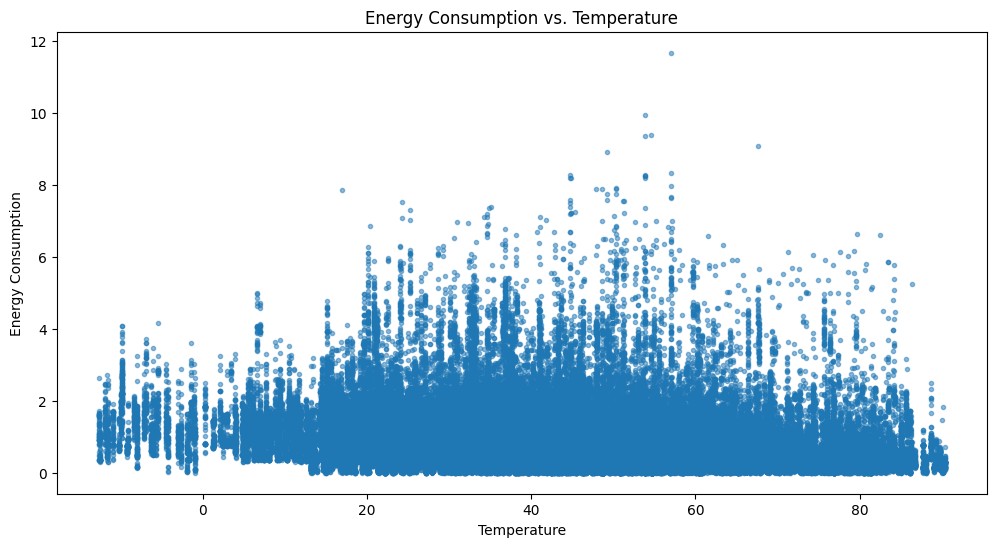

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['temperature'], dataset['use [kW]'], '.', alpha=0.5)
plt.title("Energy Consumption vs. Temperature")
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.show()


In [ ]:
from scipy.stats import zscore
z_scores = np.abs(zscore(X))
outliers = np.where(z_scores > 3)  # Threshold of 3 standard deviations
print(f"Number of outliers: {len(outliers[0])}")


Number of outliers: 196853


In [ ]:
correlation_with_energy = dataset.corr()['use [kW]'].sort_values(ascending=False)
print(correlation_with_energy)

use [kW]                            1.000000
House overall [kW]                  1.000000
Furnace 2 [kW]                      0.456647
Furnace 1 [kW]                      0.374380
Barn [kW]                           0.358765
Living room [kW]                    0.315807
Dishwasher [kW]                     0.306004
Well [kW]                           0.256905
Home office [kW]                    0.170931
Fridge [kW]                         0.170566
Kitchen 14 [kW]                     0.160431
Microwave [kW]                      0.160317
Kitchen 38 [kW]                     0.081251
icon_clear-night                    0.074938
windSpeed                           0.071697
Kitchen 12 [kW]                     0.065859
summary_Clear                       0.035247
windBearing                         0.031891
Wine cellar [kW]                    0.024826
hour                                0.023335
summary_Flurries                    0.017223
summary_Rain                        0.013350
icon_partl

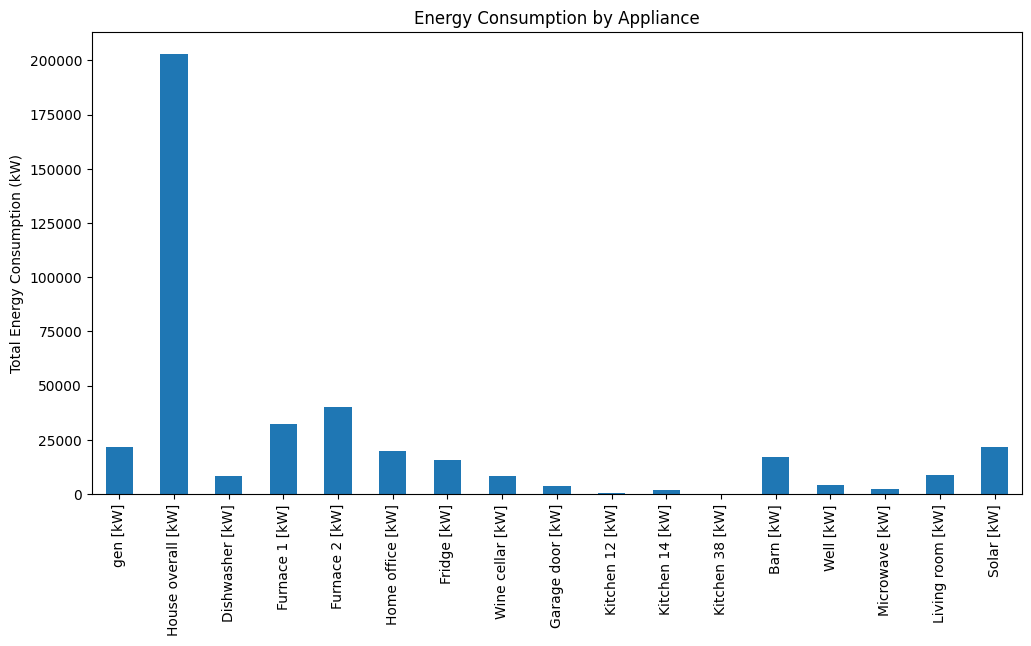

In [ ]:
appliance_cols = [col for col in dataset.columns if '[kW]' in col and col != 'use [kW]']
total_appliance_usage = dataset[appliance_cols].sum()
total_appliance_usage.plot(kind='bar', figsize=(12, 6), title="Energy Consumption by Appliance")
plt.ylabel("Total Energy Consumption (kW)")
plt.show()